In [2]:
# Step 2 – Parse FCD file in Python (with robust recovery)

from lxml import etree

# This parser handles malformed XML by attempting recovery
parser = etree.XMLParser(recover=True, encoding="utf-8")

# Load and parse the FCD XML file
tree = etree.parse('/content/fcd_output.xml', parser=parser)
root = tree.getroot()

# Store vehicle positions by time
vehicle_positions = {}

for timestep in root.findall('timestep'):
    time = float(timestep.attrib['time'])
    vehicles = []
    for vehicle in timestep.findall('vehicle'):
        vid = vehicle.attrib['id']
        x = float(vehicle.attrib['x'])
        y = float(vehicle.attrib['y'])
        vehicles.append((vid, x, y))
    vehicle_positions[time] = vehicles

# Example: print vehicle positions at time=0
print(vehicle_positions[0.0])


[('0', 0.38, 12901.48)]


In [3]:
import math
from collections import defaultdict

def calculate_entropy(vehicle_list):
    n = len(vehicle_list)
    if n == 0:
        return 0
    p = 1 / n
    return -n * p * math.log2(p)  # which equals log2(n)

entropy_over_time = []

for time, vehicles in vehicle_positions.items():
    # Group vehicles into bins
    bins = defaultdict(list)
    for vid, x, y in vehicles:
        bin_x = int(x // 50)  # 50m grid
        bin_y = int(y // 50)
        bins[(bin_x, bin_y)].append(vid)

    # Calculate entropy per bin and sum
    total_entropy = 0
    for b in bins.values():
        total_entropy += calculate_entropy(b)

    entropy_over_time.append((time, total_entropy))

# Print entropy at first timestep
print(entropy_over_time[0])

print(entropy_over_time[:10])  # first 10

print(entropy_over_time[:20])
print(entropy_over_time[:50])
print(entropy_over_time[:100])
print(entropy_over_time[:150])
print(entropy_over_time[:200])

(0.0, 0.0)
[(0.0, 0.0), (1.0, 0.0), (2.0, 0.0), (3.0, 0.0), (4.0, 1.0), (5.0, 1.0), (6.0, 1.0), (7.0, 0.0), (8.0, 0.0), (9.0, 1.0)]
[(0.0, 0.0), (1.0, 0.0), (2.0, 0.0), (3.0, 0.0), (4.0, 1.0), (5.0, 1.0), (6.0, 1.0), (7.0, 0.0), (8.0, 0.0), (9.0, 1.0), (10.0, 1.0), (11.0, 1.0), (12.0, 1.0), (13.0, 1.0), (14.0, 1.0), (15.0, 1.0), (16.0, 1.0), (17.0, 2.0), (18.0, 1.0), (19.0, 1.0)]
[(0.0, 0.0), (1.0, 0.0), (2.0, 0.0), (3.0, 0.0), (4.0, 1.0), (5.0, 1.0), (6.0, 1.0), (7.0, 0.0), (8.0, 0.0), (9.0, 1.0), (10.0, 1.0), (11.0, 1.0), (12.0, 1.0), (13.0, 1.0), (14.0, 1.0), (15.0, 1.0), (16.0, 1.0), (17.0, 2.0), (18.0, 1.0), (19.0, 1.0), (20.0, 1.0), (21.0, 1.0), (22.0, 1.0), (23.0, 1.0), (24.0, 0.0), (25.0, 2.0), (26.0, 1.0), (27.0, 0.0), (28.0, 1.0), (29.0, 3.0), (30.0, 3.0), (31.0, 1.0), (32.0, 1.0), (33.0, 1.0), (34.0, 0.0), (35.0, 0.0), (36.0, 1.0), (37.0, 1.0), (38.0, 2.0), (39.0, 1.0), (40.0, 1.0), (41.0, 1.0), (42.0, 0.0), (43.0, 2.0), (44.0, 3.0), (45.0, 2.0), (46.0, 2.0), (47.0, 3.0), (4

In [4]:
from collections import defaultdict
import math

def calculate_entropy(vehicle_list):
    n = len(vehicle_list)
    if n == 0:
        return 0
    p = 1 / n
    return -n * p * math.log2(p)  # equals log2(n)

entropy_over_time = []

for time, vehicles in vehicle_positions.items():
    bins = defaultdict(list)
    for vid, x, y in vehicles:
        bin_x = int(x // 50)
        bin_y = int(y // 50)
        bins[(bin_x, bin_y)].append(vid)

    total_entropy = 0
    for b in bins.values():
        total_entropy += calculate_entropy(b)

    entropy_over_time.append((time, total_entropy))

entropy_by_vehicle_count = defaultdict(list)

for time, entropy in entropy_over_time:
    num_vehicles = len(vehicle_positions[time])
    if 45 <= num_vehicles <= 55:
        entropy_by_vehicle_count[50].append(entropy)
    elif 95 <= num_vehicles <= 105:
        entropy_by_vehicle_count[100].append(entropy)
    elif 145 <= num_vehicles <= 155:
        entropy_by_vehicle_count[150].append(entropy)
    elif 195 <= num_vehicles <= 205:
        entropy_by_vehicle_count[200].append(entropy)

avg_entropy_per_count = {}
for count, entropies in entropy_by_vehicle_count.items():
    avg_entropy_per_count[count] = sum(entropies) / len(entropies) if entropies else 0

print("Average entropy per vehicle count bin:", avg_entropy_per_count)


Average entropy per vehicle count bin: {50: 2.3846153846153846, 100: 7.806641667147438, 150: 13.32211353994762, 200: 28.420623216037093}


In [8]:
import pandas as pd

try:
    baseline_df = pd.read_excel('/content/BASELINE_ENTROPY.xlsx')
    print("Baseline data loaded successfully:")
    display(baseline_df.head())
except FileNotFoundError:
    print("Error: BASELINE_ENTROPY.xlsx not found. Please ensure the file is uploaded to the Colab environment.")
except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

Baseline data loaded successfully:


,No of vehicle,Proposed scheme,Safety-Aware privacy [12],Obfuscation-based[50],RFPM [49],Group-Leader Shadowing [34],Coop. Pseudonym Swapping [32]
0,50,6.69,0.15,25,0.1898,4.5,1.23
1,100,15.20,0.30,32,0.0837,6.7,1.24
2,150,25.21,0.42,40,0.0831,8.3,1.24
3,200,39.51,0.54,47,0.5964,9.5,1.22


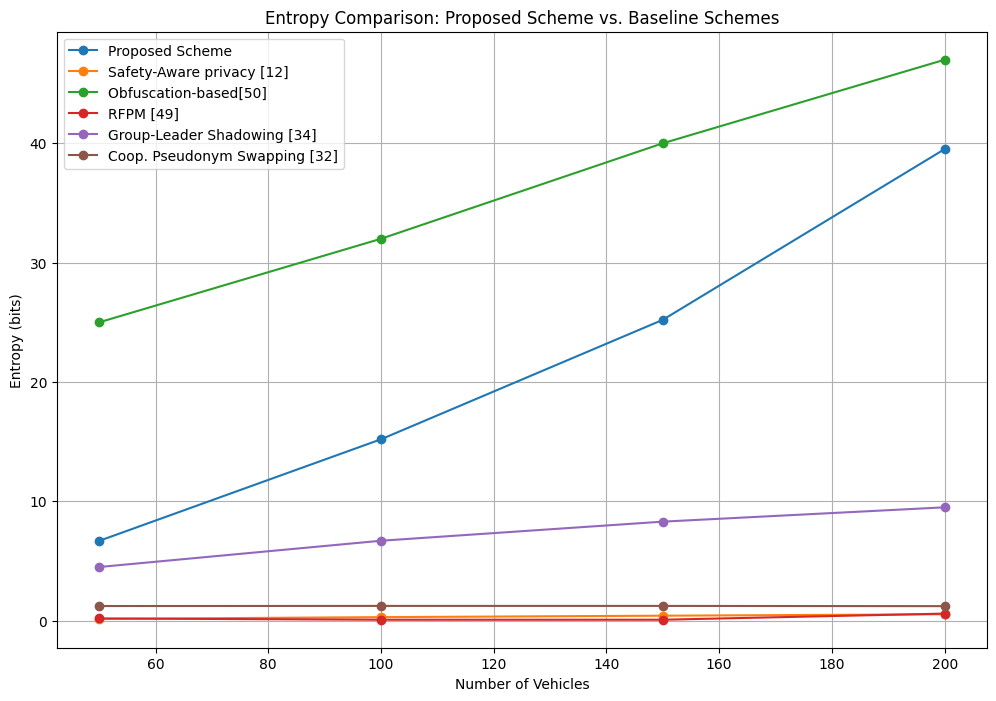

Plot saved as entropy_comparison_plot.png


<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'No of vehicle' column is used as the x-axis and is sorted
baseline_df_sorted = baseline_df.sort_values(by='No of vehicle ')

plt.figure(figsize=(12, 8))

# Plot the proposed scheme's results using the data from the baseline_df
plt.plot(baseline_df_sorted['No of vehicle '], baseline_df_sorted['Proposed scheme '], marker='o', linestyle='-', label='Proposed Scheme')

# Plot each baseline scheme from the DataFrame
for column in baseline_df_sorted.columns:
    if column != 'No of vehicle ' and column != 'Proposed scheme ':
        plt.plot(baseline_df_sorted['No of vehicle '], baseline_df_sorted[column], marker='o', linestyle='-', label=column)

plt.xlabel('Number of Vehicles')
plt.ylabel('Entropy (bits)')
plt.title('Entropy Comparison: Proposed Scheme vs. Baseline Schemes')
plt.legend()
plt.grid(True)
plt.show()
# Save the plot to a file (e.g., PNG)
plt.savefig('entropy_comparison_plot.png', bbox_inches='tight')
print("Plot saved as entropy_comparison_plot.png")

# To save as a PDF, you could use:
# plt.savefig('entropy_comparison_plot.pdf', bbox_inches='tight')

# To save as an SVG, you could use:
# plt.savefig('entropy_comparison_plot.svg', bbox_inches='tight')